In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time

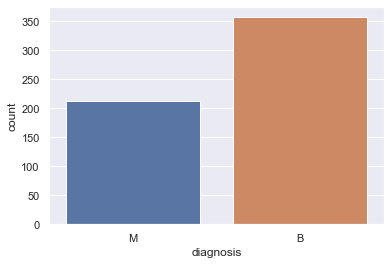

X shape = 
(569, 30)
Y shape = 
(569,)
[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]]
[[-0.20175604  0.3290786  -0.13086754 ...  1.3893291   1.08203284
   1.54029664]
 [-0.25555773  1.46763319 -0.31780437 ... -0.83369364 -0.73131577
  -0.87732522]
 [-0.02619262 -0.8407682  -0.09175081 ... -0.49483785 -1.22080864
  -0.92115937]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  1.57630515  0.20317063
  -0.15406178]
 [ 1.18859296  0.34352115  1.19333694 ...  0.56019755  0.26991966
  -0.27320074]
 [ 0.26263752 -0.58080224  0.28459338 ... -0.19383705 -1.15

In [35]:
# starting time
start = time.time()
# Reading excel file
df = pd.read_csv('/Users/kasukurthi/Downloads/data_BC.txt')

# Using seaborn to plot bar-graph of the 'diagnosis'
sns.countplot(df['diagnosis'])
plt.show()

# Removing the columns 'Unnames: 32','id' by dropping it
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

# X is the data including all the features(Here, 30)
X = df.iloc[:, 1:].values
# y is the 'diagnosis' values
y = df['diagnosis'].values
print("X shape = ")
print(X.shape)
print("Y shape = ") 
print(y.shape)

# Using train test split 
# training data and testing data is divided as 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

# Using StandardScaler to standardize the data
# Standardize is to remove the mean and scale each feature to unit variance
# In normal words, it transforms the data in such a way that
# mean = 0 and standard deviation = 1
sc = StandardScaler()
# fit_transform is used on training data
# fit method is calculating the mean and variance of each of the features present in our data
# transform method is transforming all the features using the respective mean and variance
X_train = sc.fit_transform(X_train)
# transform is used on testing data
# Using the transform method we can use the same mean and variance 
# as it is calculated from our training data to transform our test data 
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# LDA is the imported function from sklearn
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(classification_report(y_pred,y_test))
# stoping time
end = time.time()
# Print the runtime
print(f"The runtime is {end - start}" + "sec")